In [1]:
# Import data science essentials
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import copy
from numpy import matlib

# Import plotting essentials
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline


In [2]:
btc_file = 'coin_Bitcoin.csv'
eth_file = 'coin_Ethereum.csv'

In [3]:
# Reading BTC and ETH price data
btc_df = pd.read_csv(btc_file,index_col='Date',parse_dates=True)
eth_df = pd.read_csv(eth_file,index_col='Date',parse_dates=True)

In [4]:
# Using datetime to manipulate start and end dates for data
last_date = btc_df.index.max()
year = last_date - timedelta(days=1080)

end_date = f"{last_date.year}-{last_date.month}-{last_date.day}"
start_date = f"{year.year}-{year.month}-{year.day}"

In [5]:
# Slicing df using start and end dates
a = btc_df[start_date:end_date]
b = eth_df[start_date:end_date]

In [6]:
# anim = animation.FuncAnimation(fig, animate, init_func=init,frames=len(a.index), interval=100, blit=False)

In [7]:
# # equivalent to rcParams['animation.html'] = 'html5'
# rc('animation', html='html5')

In [8]:
# anim

In [9]:
# In a previous version of the model I was using a log spread of the price. I decided to make the model simpler
# and just use a price spread. Forgive the name of the df.
log_close_btc = a['Close']

In [10]:
#log_close_btc = np.log(log_close_btc)

In [11]:
log_close_btc

Date
2018-07-22 23:59:59     7418.490234
2018-07-23 23:59:59     7711.109863
2018-07-24 23:59:59     8424.269531
2018-07-25 23:59:59     8181.390137
2018-07-26 23:59:59     7951.580078
                           ...     
2021-07-02 23:59:59    33897.048590
2021-07-03 23:59:59    34668.548402
2021-07-04 23:59:59    35287.779766
2021-07-05 23:59:59    33746.002456
2021-07-06 23:59:59    34235.193451
Name: Close, Length: 1081, dtype: float64

In [12]:
log_close_eth = b['Close']
#log_close_eth = np.log(log_close_eth)
log_close_eth

Date
2018-07-22 23:59:59     459.657013
2018-07-23 23:59:59     450.852997
2018-07-24 23:59:59     479.372986
2018-07-25 23:59:59     472.493011
2018-07-26 23:59:59     464.036987
                          ...     
2021-07-02 23:59:59    2150.040364
2021-07-03 23:59:59    2226.114282
2021-07-04 23:59:59    2321.724112
2021-07-05 23:59:59    2198.582464
2021-07-06 23:59:59    2324.679449
Name: Close, Length: 1081, dtype: float64

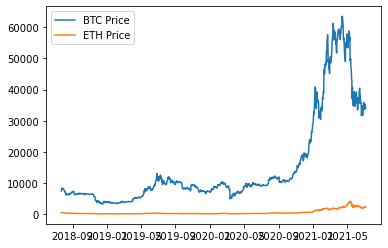

In [13]:
# Plotting BTC and ETH price series
plt.plot(log_close_btc.index,log_close_btc, label="BTC Price")
plt.plot(log_close_eth.index,log_close_eth, label="ETH Price")
plt.legend()
plt.show()

In [14]:
# Renaming dfs for Linear Mean Reversion strat
spread_btc = log_close_btc
spread_eth = log_close_eth

# This was used for a log return spread strategy. It was too difficult to implement so I decided to
# use a price spread instead with Linear Mean Reversion

# for i in range(1,len(log_close_btc)): 
#     spread_btc.append(log_close_btc[i]-log_close_btc[i-1])
#     spread_eth.append(log_close_eth[i]-log_close_eth[i-1])

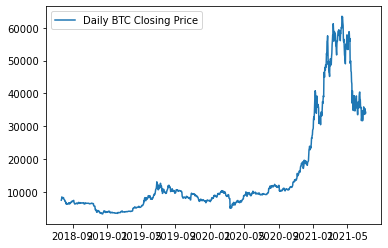

In [15]:
# Plotting df (just checking data)
plt.plot(log_close_btc.index[:],spread_btc, label='Daily BTC Closing Price')
plt.legend()
plt.savefig('../static/img/btc_price.png',facecolor='white')
plt.show()

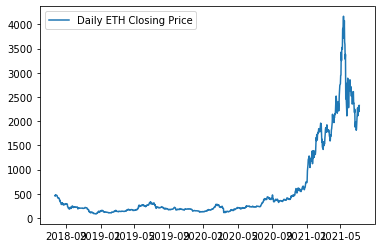

In [16]:
# Plotting df (just checking data)
plt.plot(log_close_eth.index[:],spread_eth, label='Daily ETH Closing Price')
plt.legend()

In [17]:
# Found this code on the internet to check for stationarity of time series. Wish I had the time to
# nerd out and understand it, but alas I do not have such luxuries.
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

def cointegration_test(Y, X):
    # Step 1: regress on variable on the other 
    ols_result = sm.OLS(Y, X).fit() 
    # Step 2: obtain the residual (ols_resuld.resid)
    # Step 3: apply Augmented Dickey-Fuller test to see whether 
    #        the residual is unit root    
    return ts.adfuller(ols_result.resid)

In [18]:
# Initially the price series fails the stationary hypthesis test. Thats okay most pair trades fail this anyway
# its just a nice to have.
cointegration_test(spread_btc,spread_eth)

(-3.290837871713335,
 0.015293022401032306,
 22,
 1058,
 {'1%': -3.4365458759424543,
  '5%': -2.8642756688664193,
  '10%': -2.5682265737329413},
 17442.489871869577)

In [19]:
ols_result=sm.OLS(spread_btc, spread_eth).fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              8049.
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                        0.00
Time:                        16:58:17   Log-Likelihood:                         -11150.
No. Observations:                1081   AIC:                                  2.230e+04
Df Residuals:                    1080   BIC:                                  2.231e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         21.1630      0.236     89.718      0.000      20.700      21.626
==============================================================================
Omnibus:                      463.375   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3502.323
Skew:                          -1.796   Prob(JB):                         0.00
Kurtosis:                      11.053   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

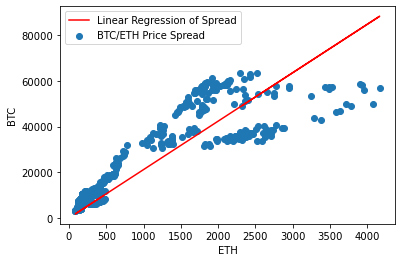

Close    21.163026
dtype: float64


In [20]:
# This analysis is not used in the model it was just some prelimenary analysis. I think i mispelled that.
plt.scatter(spread_eth,spread_btc,label='BTC/ETH Price Spread')
plt.plot(spread_eth, ols_result.predict(),label='Linear Regression of Spread',c="red")
plt.legend()
plt.xlabel('ETH')
plt.ylabel('BTC')
plt.savefig('../static/img/regression_example_results.png',facecolor='white')
plt.show()

print(ols_result.params)

In [21]:
# Were finally ready to start implementing the pair trade model! 

# First set an arbitrary lookback window and introduce bias into the model. Ideally we should use a quantitative
# method to approximate this, but again no time. Ornstein–Uhlenbeck formula is a good choice to estimate half-life
# of mean reversion, however again, no time.

# Possibly could use a Data Science approach like a grid search or something and filter results for highest returns
# but thats a fantastic way to introduce over-fitting. I personally find quantitative approaches more comforting.
lookback=7

# Pre-allocate hedgeRatio array
hedgeRatio=np.empty(len(spread_btc))
hedgeRatio[:]=np.nan

# Use for loop, lookback window, and OLS to estimate hedgeRatio (BTC-hedgeRatio*ETH)
for t in range(lookback,len(hedgeRatio),1):
    
    regression_result=sm.OLS(spread_btc[t-lookback:t],spread_eth[t-lookback:t]).fit()
    hedgeRatio[t]=regression_result.params[0]

In [22]:
# Testing how sm.OLS module works

# lookback=20
# t=lookback
# regression_result=sm.OLS(spread_btc[t-lookback:t],spread_eth[t-lookback:t]).fit()
# regression_result.params

In [23]:
# y2 = [independent_spread dependent_spread]

# Create array to store prices for ETH and BTC
y2 = np.array([spread_eth, spread_btc]).transpose()

# introducing massive amounts of look-ahead bias :)
hedgeRatio_df = pd.DataFrame(hedgeRatio,columns=['Hedge Ratio'])
hedgeRatio_df.fillna(method='bfill',inplace=True)
hedgeRatio_df['Ones'] = np.ones(len(spread_btc))
hedgeRatio1 = copy.deepcopy(hedgeRatio_df)

hedgeRatio1

,Hedge Ratio,Ones
0,17.180357,1.0
1,17.180357,1.0
2,17.180357,1.0
3,17.180357,1.0
4,17.180357,1.0
...,...,...
1076,16.604064,1.0
1077,16.386132,1.0
1078,16.134858,1.0
1079,15.824521,1.0


In [24]:
# For next step we need the negative of the hedgeRatio so...
hedgeRatio1['Hedge Ratio'] = hedgeRatio1['Hedge Ratio']*-1.0
hedgeRatio1

,Hedge Ratio,Ones
0,-17.180357,1.0
1,-17.180357,1.0
2,-17.180357,1.0
3,-17.180357,1.0
4,-17.180357,1.0
...,...,...
1076,-16.604064,1.0
1077,-16.386132,1.0
1078,-16.134858,1.0
1079,-15.824521,1.0


In [25]:
# Calculating unit portfolio price using hedgeRatio and ETH-BTC prices
yport = np.sum(np.multiply(hedgeRatio1,y2),axis=1)
yport

0       -478.581563
1        -34.705791
2        188.470271
3         63.791295
4        -20.741245
           ...     
1076   -1802.359048
1077   -1808.854525
1078   -2172.908367
1079   -1045.510918
1080   -2179.001741
Length: 1081, dtype: float64

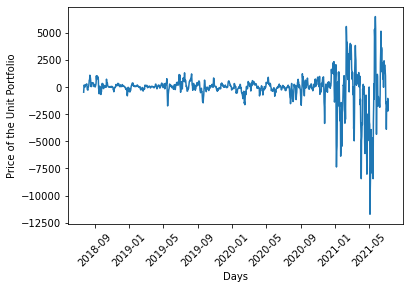

In [26]:
# Plot the price of the unit portfolio. Notice that the mean is close to zero, but the variance increases over time.
# Probably good enough to trade but we will see...

# The fact that the Unit Portfolio mean stays near zero means that the OLS was successful in attempting to 
# create a stationary series. However, since the var increases over time the OLS is not aggressive enough.
# This is a job for a Kalman Filter but no time :(.

plt.plot(log_close_btc.index,yport)
plt.xlabel('Days')
plt.ylabel('Price of the Unit Portfolio')
plt.xticks(rotation=45)
plt.savefig('../static/img/unit_port.png',facecolor='white')
plt.show()

In [27]:
# Seems that the series is stationary despite the variance increasing over time.
l = log_close_btc.reset_index().index.to_numpy()
cointegration_test(yport,l)

(-4.880040928820613,
 3.8132072039384515e-05,
 18,
 1062,
 {'1%': -3.4365224825380714,
  '5%': -2.86426535058257,
  '10%': -2.568221078163292},
 17243.89711135054)

In [28]:
# Convert unit portfolio to df
yport_df = pd.DataFrame(yport)
yport_df

,0
0,-478.581563
1,-34.705791
2,188.470271
3,63.791295
4,-20.741245
...,...
1076,-1802.359048
1077,-1808.854525
1078,-2172.908367
1079,-1045.510918


In [29]:
# # Bollinger band strategy was a total failure! Using Linear Mean Reversion instead

# entryZscore=-1
# exitZscore=1

# # Calculates zScore for every day in the spread
# zScore=(yport_df-yport_df.rolling(window=lookback).mean())/yport_df.rolling(window=lookback).std()

# # Sets longsEntry array to zScore value if below entry threshold
# longsEntry=zScore < entryZscore

# # Sets longsExit array to zScore value if above exit threshold
# longsExit=zScore >= exitZscore

# # Set shortsEntry array to zScore value if above entry threshold
# shortsEntry=zScore > -entryZscore

# # Set shortsEntry array to zScore value if below exit threshold
# shortsExit=zScore <= -exitZscore

# # Setting Up simulated long trades
# numUnitsLong=np.empty(len(yport_df))
# numUnitsLong[:]=np.nan

# # Setting up simulated short trades
# numUnitsShort=np.empty(len(yport_df))
# numUnitsShort[:]=np.nan

# # Convert np long arrays to dfs
# numUnitsLong[0]=0
# numUnitsLong = pd.DataFrame(numUnitsLong)
# # Convert np short arrays to dfs
# numUnitsShort[0]=0
# numUnitsShort = pd.DataFrame(numUnitsShort)

# numUnitsLong[0].iloc[longsEntry.reset_index().loc[longsEntry.reset_index()['Spread']==True].index]=1
# numUnitsLong[0].iloc[longsExit.reset_index().loc[longsExit.reset_index()['Spread']==True].index]=0

# numUnitsLong.fillna(method='ffill',inplace=True)


# numUnitsShort[0].iloc[shortsEntry.reset_index().loc[shortsEntry.reset_index()['Spread']==True].index]=-1
# numUnitsShort[0].iloc[shortsExit.reset_index().loc[shortsExit.reset_index()['Spread']==True].index]=0

# numUnitsShort.fillna(method='ffill',inplace=True)

# numUnits= numUnitsLong + numUnitsShort
# numUnits.fillna(0)
# numUnits



In [30]:
# For Linear Mean Reversion strategy we scale into the position as the unit portfolio
# deviates further from its mean. Anticipating mean reversion we unload the position and capture a profit....
# at least theoretically.
zScore=-(yport_df-yport_df.rolling(window=lookback).mean())/yport_df.rolling(window=lookback).std()

# This backfill introduces look-ahead bias but I had to deal with the nan somehow. In a production model this
# is certainly a no no.
zScore.fillna(method='bfill',inplace=True)
zScore.head(20)

,0
0,-0.762123
1,-0.762123
2,-0.762123
3,-0.762123
4,-0.762123
5,-0.762123
6,-0.762123
7,-1.089247
8,-1.111477
9,-0.631393


In [31]:
# Had to create a deep copy since y2 is overwritten when calculating positions. IDK why that happens though.
y3 = copy.deepcopy(y2)
y3

array([[  459.65701294,  7418.49023438],
       [  450.85299683,  7711.10986328],
       [  479.37298584,  8424.26953125],
       ...,
       [ 2321.72411157, 35287.77976616],
       [ 2198.58246387, 33746.00245614],
       [ 2324.67944917, 34235.19345116]])

In [32]:
hedgeRatio2 = copy.deepcopy(hedgeRatio_df)

In [33]:
# Preparing hedgeRatio df for calculating daily position sizes in next cell
hedgeRatio2['Ones'] = hedgeRatio2['Ones']*-1.0
hedgeRatio2

,Hedge Ratio,Ones
0,17.180357,-1.0
1,17.180357,-1.0
2,17.180357,-1.0
3,17.180357,-1.0
4,17.180357,-1.0
...,...,...
1076,16.604064,-1.0
1077,16.386132,-1.0
1078,16.134858,-1.0
1079,15.824521,-1.0


In [34]:
# Positions array for Linear Mean Reversion Strategy
positions = np.multiply(matlib.repmat(zScore,1,2),hedgeRatio2,y2)

In [35]:
# Positions for strategy. First column is ETH position size. Second is BTC.
# For example 5.2 units of ETH per -1.47 units of BTC. These daily positions should keep
# the unit portfolio stationary
# if a position is negative that means we are short selling. This may not be possible, depends on the exchange.
# Also, technically short selling carries infinite risk, for example in the case of short squeezes. 
# GameStop and wallstreetbets reddit should come to mind.


positions

array([[-13.0935538 ,   0.76212348],
       [-13.0935538 ,   0.76212348],
       [-13.0935538 ,   0.76212348],
       ...,
       [  1.75220504,  -0.10859749],
       [-16.83094218,   1.06359887],
       [  0.9125932 ,  -0.05825988]])

In [36]:
# Calculating Daily Profit and Loss
# This is as simple as multiplying the position size times the calculated returns using y3

pnl_arr = [0]
    
for i in range(1,y3.shape[0]):
    
    # Calculate pnl for independent variable (ETH)
    independent_return = positions[i-1,0]*((y3[i,0]-y3[i-1,0])/y3[i-1,0])
    
    # Calcualate pnl for dependent variable (BTC)
    dependent_return = positions[i-1,1]*(y3[i,1]-y3[i-1,1])/y3[i-1,1]
    
    # Compute daily_pnl by summing pnl for independent and dependent variable
    daily_pnl = independent_return+dependent_return
        
    pnl_arr.append(daily_pnl)


In [37]:
pnl_df = pd.DataFrame(pnl_arr,columns=['Daily PnL'])
positions_df = pd.DataFrame(positions,columns=['ETH Position','BTC Position'])

In [38]:
# temp_df is calculating the gross market value of the portfolio in preparation for returns in next cell
temp_df = positions_df.shift(1).abs().sum(axis=1)
temp_df

0        0.000000
1       13.855677
2       13.855677
3       13.855677
4       13.855677
          ...    
1076    11.376895
1077     6.144365
1078     2.226883
1079     1.860803
1080    17.894541
Length: 1081, dtype: float64

In [39]:
# Computing daily returns
ret_df = pnl_df['Daily PnL'].div(temp_df)
ret_df

0            NaN
1       0.020270
2      -0.054691
3       0.011977
4       0.015367
          ...   
1076    0.015729
1077    0.032080
1078    0.039452
1079   -0.047394
1080   -0.053083
Length: 1081, dtype: float64

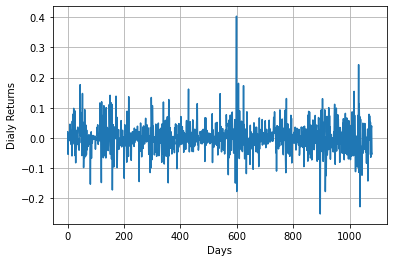

In [40]:
# Plotting daily returns
plt.plot(ret_df)
plt.xlabel('Days')
plt.ylabel('Dialy Returns')
plt.grid()
plt.savefig('../static/img/daily_ret.png',facecolor='white')
plt.show()

# Looks like strat is pure choas lol

In [41]:
# Computing cumulative returns. I'm so glad pandas has functions built in for this!
cumulative_ret = ret_df[1:].add(1).cumprod().sub(1)
cumulative_ret

1       0.020270
2      -0.035530
3      -0.023979
4      -0.008980
5      -0.018878
          ...   
1076   -0.607162
1077   -0.594560
1078   -0.578565
1079   -0.598538
1080   -0.619849
Length: 1080, dtype: float64

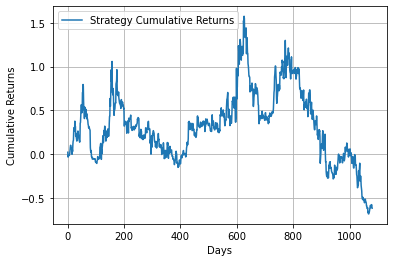

In [42]:
# Plotting cumulative returns
plt.plot(cumulative_ret,label='Strategy Cumulative Returns')
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')
plt.grid()
plt.legend()
plt.savefig('../static/img/cum_ret_results.png',facecolor='white')
plt.show()

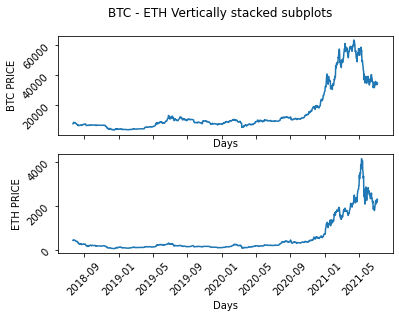

In [43]:
fig, (ax1,ax2) = plt.subplots(2,sharex=True)

fig.suptitle('BTC - ETH Vertically stacked subplots')

ax1.plot(a['Close'])
ax2.plot(b['Close'])

ax1.set(xlabel='Days',ylabel='BTC PRICE')
ax2.set(xlabel='Days',ylabel='ETH PRICE')

# ax1.get_xticklabels().set_rotation(45)
# ax2.set_xticklabels(rotation=45)

ax1.tick_params(labelrotation=45)
ax2.tick_params(labelrotation=45)

# Well all this work and we get garbage!
# Fun exercise though. This isn't surprising considering all the bias and steps we skipped.

In [44]:
# My suspicion on why the strategy doesn't work very well:
# When ever the price action of BTC-ETH gets very volatile the moving Linear Regression cannot keep up.
# So the hedgeRatio is thrown off
# and the strategy quickly breaks down. A production level model would have a risk management system in place to
# anticipate or kill the strategy before realzing huge losses.
# Additionally, Quant firms would have multiple strategies running concurrently to diversy the risk.

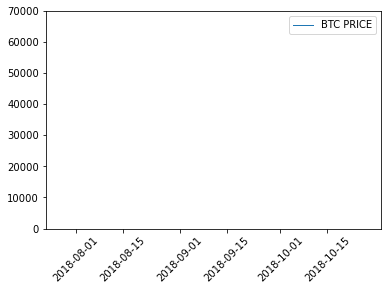

In [45]:
# First set up the figure, the axis, and the plot element we want to animate
fig, (ax1,ax2) = plt.subplots(2)

# Set up x-axis moving window
moving_window = 100
x_last = a.index.min()+timedelta(days=moving_window)
x_first = a.index.min()

# Update plot with starting background axis and labels
ax = plt.axes(xlim=(x_first,x_last),ylim=(0,70000))
line, = ax.plot([], [], lw=1,label='BTC PRICE')
line.axes.tick_params(axis='x', labelrotation = 45)
plt.legend()

In [46]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

In [47]:
moving_window = 100
x_last = a.index.min()+timedelta(days=moving_window)
x_first = a.index.min()
dt = timedelta(days=1)

def animate(i):
    global x_last
    global x_first
    global dt
    
    x = a.index[:i]
    y = a['Close'][:i]
    line.set_data(x, y)
    
    if a.index[i] >= x_last-dt:
        x_last += dt 
        x_first += dt
        line.axes.set_xlim(x_first,x_last)
        
    return line,

In [48]:
simulation = animation.FuncAnimation(fig, animate, blit=False, frames=200, interval=20, repeat=False)


In [49]:
simulation.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])